In [1]:
# Import all required libraries
import os
import gdown
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
url = "https://drive.google.com/file/d/1X-RXCt4kvl7v9vtwPqNilc6Zxi5E3THL/view?usp=sharing"
filename = 'SITUATION.zip'
gdown.download(url, output=filename, quiet=False, use_cookies=True, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1X-RXCt4kvl7v9vtwPqNilc6Zxi5E3THL
From (redirected): https://drive.google.com/uc?id=1X-RXCt4kvl7v9vtwPqNilc6Zxi5E3THL&confirm=t&uuid=88f90984-8b66-4532-8628-c264b9f71f13
To: /content/SITUATION.zip
100%|██████████| 56.8M/56.8M [00:00<00:00, 66.1MB/s]


'SITUATION.zip'

In [3]:
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("/content")

In [4]:
image_dir = "/content/SITUATION/"
train_dir = os.path.join(image_dir,'TRAIN')
test_dir = os.path.join(image_dir,'TEST')

print("Train directory -> ", train_dir)
print("Test directory -> ", test_dir)

Train directory ->  /content/SITUATION/TRAIN
Test directory ->  /content/SITUATION/TEST


In [5]:
train_Ok_dir = os.path.join(train_dir,'OK')
train_NotOk_dir =os.path.join(train_dir,'NOT OK')
train_NotInRange_dir =os.path.join(train_dir,'NOT IN RANGE')

print("OK directory -> ", train_Ok_dir)
print("NOT OK directory -> ", train_NotOk_dir)
print("NOT IN RANGE directory -> ", train_NotInRange_dir)

OK directory ->  /content/SITUATION/TRAIN/OK
NOT OK directory ->  /content/SITUATION/TRAIN/NOT OK
NOT IN RANGE directory ->  /content/SITUATION/TRAIN/NOT IN RANGE


In [6]:
image_files_Ok = os.listdir(train_Ok_dir)
image_files_NotOk = os.listdir(train_NotOk_dir)
image_files_NotInRange = os.listdir(train_NotInRange_dir)

print("Images found OK -> ", image_files_Ok[:5]) # slicing the data upto 5 images
print("Images found NOT OK -> ", image_files_NotOk[:5]) # slicing the data upto 5 images
print("Images found NOT IN RANGE -> ", image_files_NotInRange[:5]) # slicing the data upto 5 images

Images found OK ->  ['OK-136.jpg', 'OK-127.jpg', 'OK-124.jpg', 'OK-58.jpg', 'OK-143.jpg']
Images found NOT OK ->  ['NOT OK-110.jpg', 'NOT OK-127.jpg', 'NOT OK-119.jpg', 'NOT OK-216.jpg', 'NOT OK-206.jpg']
Images found NOT IN RANGE ->  ['18.jpeg', '65.jpeg', '40.jpeg', '53.jpeg', '33.jpeg']


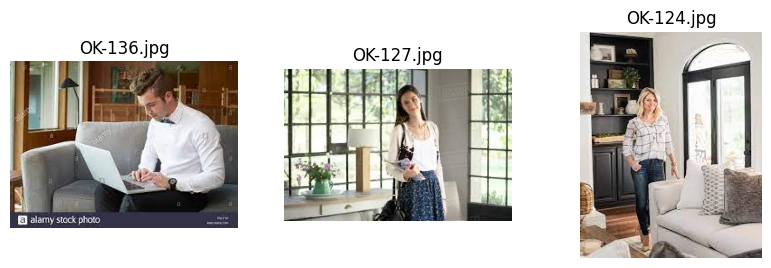

In [7]:
plt.figure(figsize=(10,10))
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    mg_path = os.path.join(train_Ok_dir, image_files_Ok[i])
    img = mpimg.imread(mg_path)  # Load the image from file path
    plt.imshow(img)
    plt.title(image_files_Ok[i])
    plt.axis("off")

In [8]:
# Normalize each image values between 0 and 1.
trainDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest',
    shear_range = 0.5
)

testDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest',
    shear_range = 0.5
)

In [9]:
training = trainDataGen.flow_from_directory(train_dir, target_size=(150, 150)) # Provie the train directory to model.
training.class_indices                                                         # Labeling to the data set by creating JSON.

Found 501 images belonging to 3 classes.


{'NOT IN RANGE': 0, 'NOT OK': 1, 'OK': 2}

In [10]:
testing = testDataGen.flow_from_directory(test_dir, target_size=(150, 150))
testing.class_indices

Found 132 images belonging to 3 classes.


{'NOT IN RANGE': 0, 'NOT OK': 1, 'OK': 2}

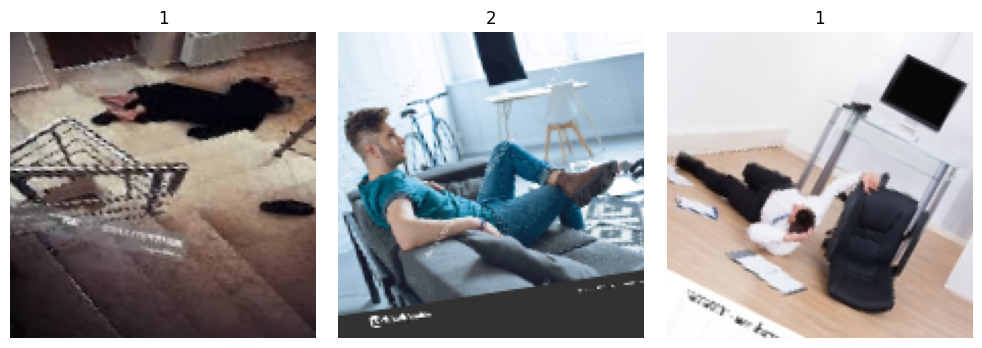

In [11]:
# Get one batch of images and labels
images, labels = next(training)

# Plot the images
plt.figure(figsize=(10,10))
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])         # Already normalized [0,1]
    plt.title(np.argmax(labels[i]))  # If categorical, get class index
    plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
model=models.Sequential()                             # Sequential layering.
model.add(layers.Conv2D(32,(3,3),activation='relu'))  # Create window to standardize picxels.
model.add(layers.MaxPooling2D((2,2)))                 # Used for controlling over fitting.
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))       # For creating 3 outputs

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(training, validation_data=testing, steps_per_epoch=8, epochs=15, verbose=1) # Repeat 15 times to refine accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3117 - loss: 2.3273 - val_accuracy: 0.3106 - val_loss: 1.1502
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4250 - loss: 1.0962 - val_accuracy: 0.3106 - val_loss: 1.1061
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4959 - loss: 1.0729 - val_accuracy: 0.3106 - val_loss: 1.4252
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3752 - loss: 1.1925 - val_accuracy: 0.3106 - val_loss: 1.2511
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3669 - loss: 1.0837 - val_accuracy: 0.3106 - val_loss: 1.1047
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4609 - loss: 1.0562 - val_accuracy: 0.3106 - val_loss: 1.1140
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4710 - loss: 1.0512 - val_accuracy: 0.4167 - val_loss: 1.1036
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4408 - loss: 1.0446 - val_accuracy: 0.2955 - val_loss: 1.1133
Epoch 9/

In [15]:
model.save('models/scene-detect.h5')

In [16]:
model.summary() # Summarize the layering details

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,070,408 (145.23 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,035,205 (72.61 MB)

In [17]:
from google.colab import files
up = files.upload()

Saving Chilling.jpeg to Chilling.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


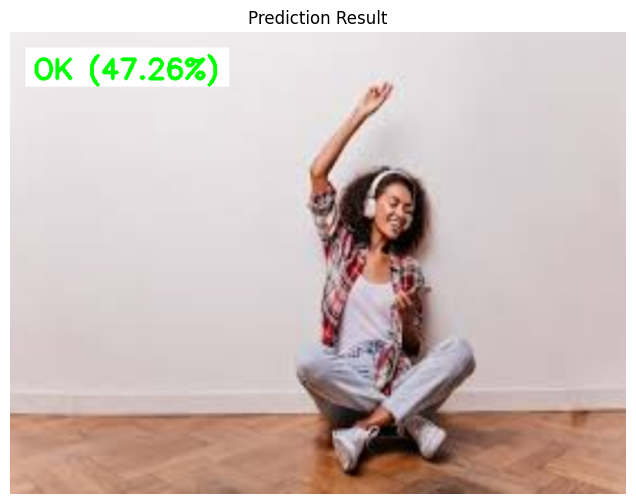

In [18]:
# Load the image
img_path = "Chilling.jpeg"  # <- your test image path
img = image.load_img(img_path, target_size=(150, 150, 3))  # Match input size of model

# Convert and preprocess image
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
confidence = np.max(predictions[0])  # Highest probability
predicted_class = np.argmax(predictions[0])  # Index of prediction

# Map class index to label
class_indices = training.class_indices  # Dictionary from training (e.g., {'OK': 0, 'NOT OK': 1, ...})
labels = dict((v, k) for k, v in class_indices.items())  # Invert it
predicted_label = labels[predicted_class]

# Load original image using OpenCV
cv_img = cv2.imread(img_path)
cv_img = cv2.resize(cv_img, (800, 600))  # Resize for display

# Determine color based on predicted label
if predicted_label == "OK":
    color = (0, 255, 0)  # Green
elif predicted_label == "NOT OK":
    color = (0, 0, 255)  # Red
else:
    color = (0, 0, 0)  # Black

# Prepare text
text = f"{predicted_label} ({confidence * 100:.2f}%)"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.2
thickness = 3
text_position = (30, 60)

# Draw background rectangle for better visibility
(text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness)
cv2.rectangle(cv_img,
              (text_position[0] - 10, text_position[1] - 40),
              (text_position[0] + text_width + 10, text_position[1] + 10),
              (255, 255, 255),
              -1)  # White background

# Now add the text on top of the rectangle
cv2.putText(cv_img, text, text_position, font, font_scale, color, thickness)

# Convert BGR (OpenCV) to RGB (matplotlib)
cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

# Show with matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv_img_rgb)
plt.axis('off')
plt.title("Prediction Result")
plt.show()